In [149]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal

DATADIR = "DB_NG"
#DATAFILE = "gripe.txt"
DATAFILE = np.load('DB_NG/data_173318.npy')
#datafile = os.path.join(DATADIR, DATAFILE)
#df = pd.read_csv(datafile, sep=",", skiprows=1, header=None, names=['Sample'])
df = pd.DataFrame(DATAFILE, columns=['Sample','Label'])

#df = df.dropna()
df.head()

,Sample,Label
0,588.0,0.0
1,612.0,0.0
2,587.0,0.0
3,588.0,0.0
4,529.0,0.0


<IPython.core.display.Javascript object>


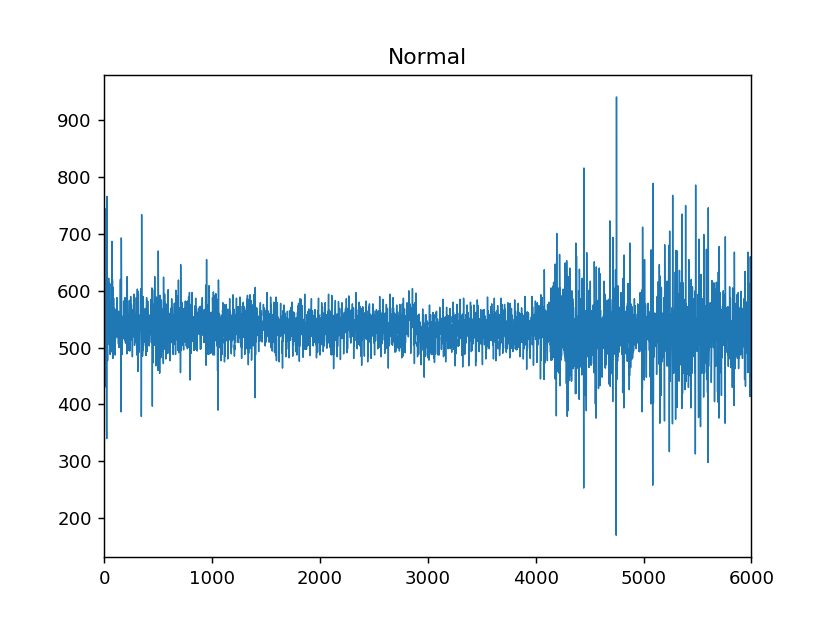

In [154]:
%matplotlib notebook
import matplotlib.pyplot as plt

df['Sample'].plot(linewidth=0.8)
plt.title('Normal')

In [151]:
df['Time']=pd.DataFrame(range(len(df['Sample'])))
df['Time'] = df['Time']/2000

<IPython.core.display.Javascript object>


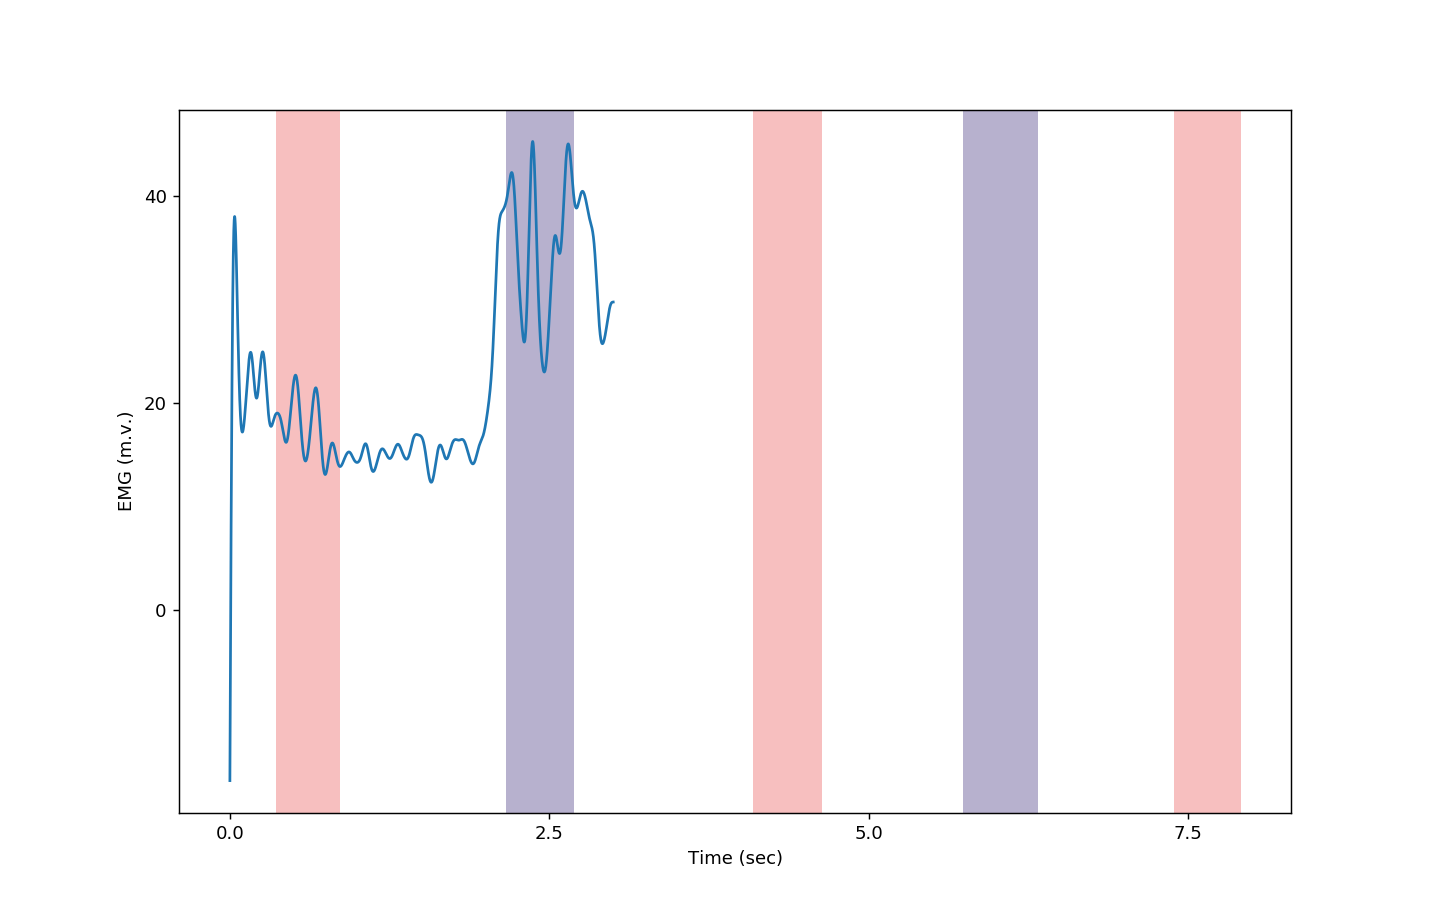

In [155]:
def filteremg(time, emg, low_pass=10., sfreq=2000., high_band=20., low_band=450.):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    return emg_envelope

def plot_fremg(df):   
    # plot graphs
    fig = plt.figure()
    

    #plt.subplot(4, 1, 1).xaxis.set_visible(False)
    #plt.subplot(4, 1, 1).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(40)) + ' Hz' + '\n VL-d')
    plt.plot(fr_emg['Time'], fr_emg['Sample'])
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.axvspan(0.36, 0.860, facecolor='#F08080', alpha=0.5)
    plt.axvspan(2.16, 2.69, facecolor='#70659e', alpha=0.5)
    plt.axvspan(4.09, 4.632, facecolor='#F08080', alpha=0.5)
    plt.axvspan(5.74, 6.32, facecolor='#70659e', alpha=0.5)
    plt.axvspan(7.39, 7.91, facecolor='#F08080', alpha=0.5)
    #plt.axvspan(7.996, 9.466, facecolor='#70659e', alpha=0.5)
    #plt.axvspan(9.465, 11.017, facecolor='#F08080', alpha=0.5)
    #plt.axvspan(11.016, 12.491, facecolor='#70659e', alpha=0.5)
    #plt.annotate('C1', xy=((2.087-0.599)/2+0.3, fr_emg['VL'].max()*.85))  
    #plt.annotate('C2', xy=((1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C3', xy=((2*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C4', xy=((3*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C5', xy=((4*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C6', xy=((5*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C7', xy=((6*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C8', xy=((7*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    plt.ylabel('EMG (m.v.)')
    plt.xlabel('Time (sec)')
    
    

    fig_name = 'fig_' + str(int(40)) + '.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

# show what different low pass filter cut-offs do
fr_emg = pd.DataFrame(df['Time'])


emg_correctmean = np.array(df['Sample'])
fr_emg['Sample'] = pd.DataFrame(filteremg(df['Time'], emg_correctmean, low_pass=20))

plot_fremg(fr_emg)

## FFT Function

In [74]:
def plot_fft(x, fs):
    X =np.abs(np.fft.fft(x))
    f =np.linspace(0, fs,x.shape[0])
    plt.figure()
    plt.plot(f,X, linewidth=0.2)
    plt.xlabel("Frequency")
    plt.show()


<IPython.core.display.Javascript object>


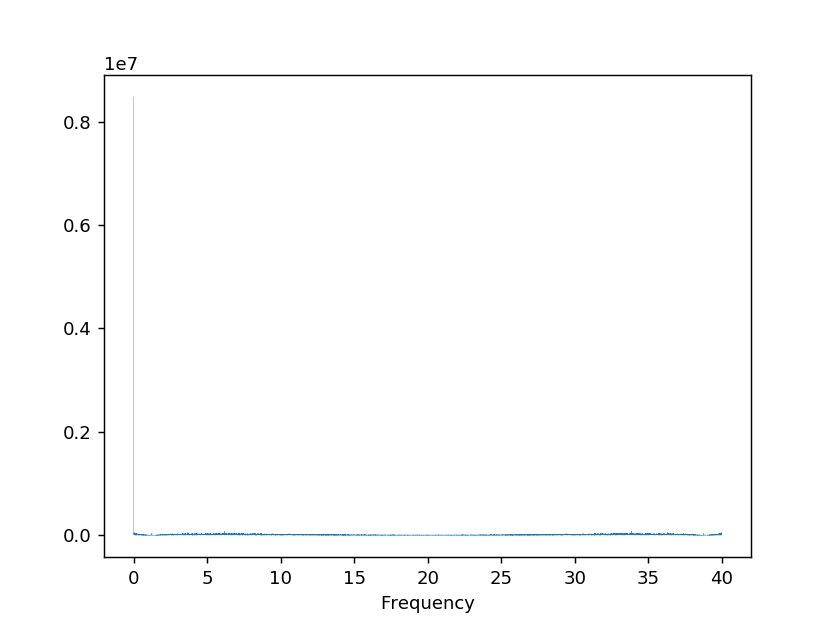

In [75]:
plot_fft(df['Sample'], 40)

## RMS Function

In [78]:
import numpy as np
def window_rms(a, window_size):
  a2 = np.power(a,2)
  window = np.ones(window_size)/float(window_size)
  return np.sqrt(np.convolve(a2, window, 'valid'))

<IPython.core.display.Javascript object>


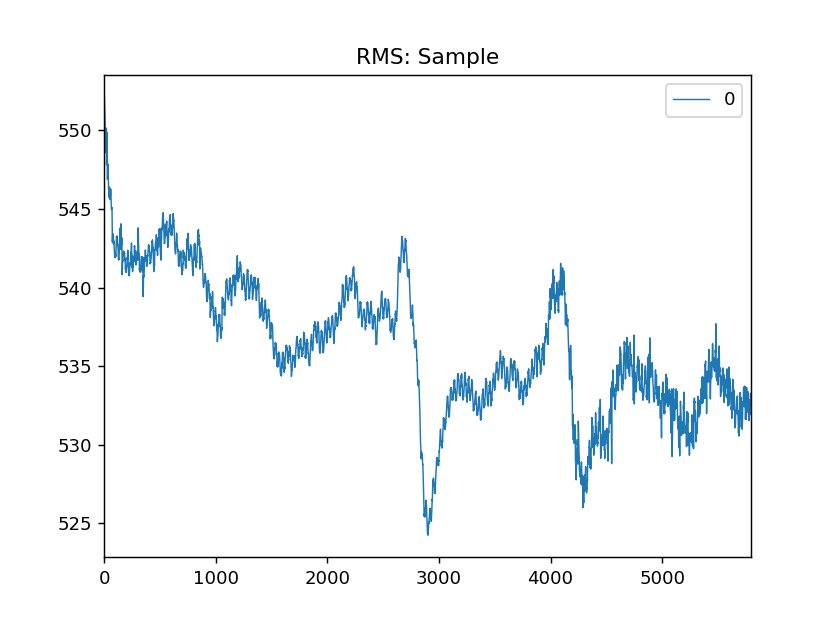

In [153]:
i = 'Sample'
u = df[i]

rms = window_rms(u,200)

df_rms = pd.DataFrame(rms)

df_rms.plot(linewidth=0.8)
plt.title('RMS: '+i)